# PPO analysis

In [17]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [18]:
path_1 = r"/home/docker/car_racing/models/PPO_1"
path_2 = r"/home/docker/car_racing/models/PPO_3"
path_3 = r"/home/docker/car_racing/models/PPO_4"

In [19]:
file_1 = os.path.join(path_1, "2024-03-30 162204.470391_PPO_training_results.json")
file_2 = os.path.join(path_2, "2024-04-01 133431.925492_PPO_training_results.json")
file_3 = os.path.join(path_3, "2024-04-02 160002.597466_PPO_training_results.json")

with open(file_1, "r") as f:
    data_1 = json.load(f)
with open(file_2, "r") as f:
    data_2 = json.load(f)
with open(file_3, "r") as f:
    data_3 = json.load(f)

In [20]:
def convert_data(data):
    return {key: ast.literal_eval(value) for key, value in data.items()}


In [21]:
for dictionary in [data_1, data_2, data_3]:
    dictionary.pop("loss_evolution")

In [22]:
data_1 = convert_data(data_1)
data_2 = convert_data(data_2)
data_3 = convert_data(data_3)

In [23]:
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)

In [24]:
df1.columns

Index(['episode', 'time_frame_counter', 'reward_moving_avg', 'episode_steps',
       'episode_reward', 'average_rewards'],
      dtype='object')

In [25]:
keep_cols = ['time_frame_counter', 'episode_reward', 'reward_moving_avg', 'average_rewards']

In [26]:
df1 = df1[keep_cols]
df2 = df2[keep_cols]
df3 = df3[keep_cols]

Params:
- PPO
- Hidden layers 256,
- CNN output size 256
- learning rate 0.00025
- gamma 0.99
- max_grad_norm 0.5
- clip param 0.1
- ppo epoch 10
- batch size 64
- network update frequency 1
- sync freq 100
- gas 4

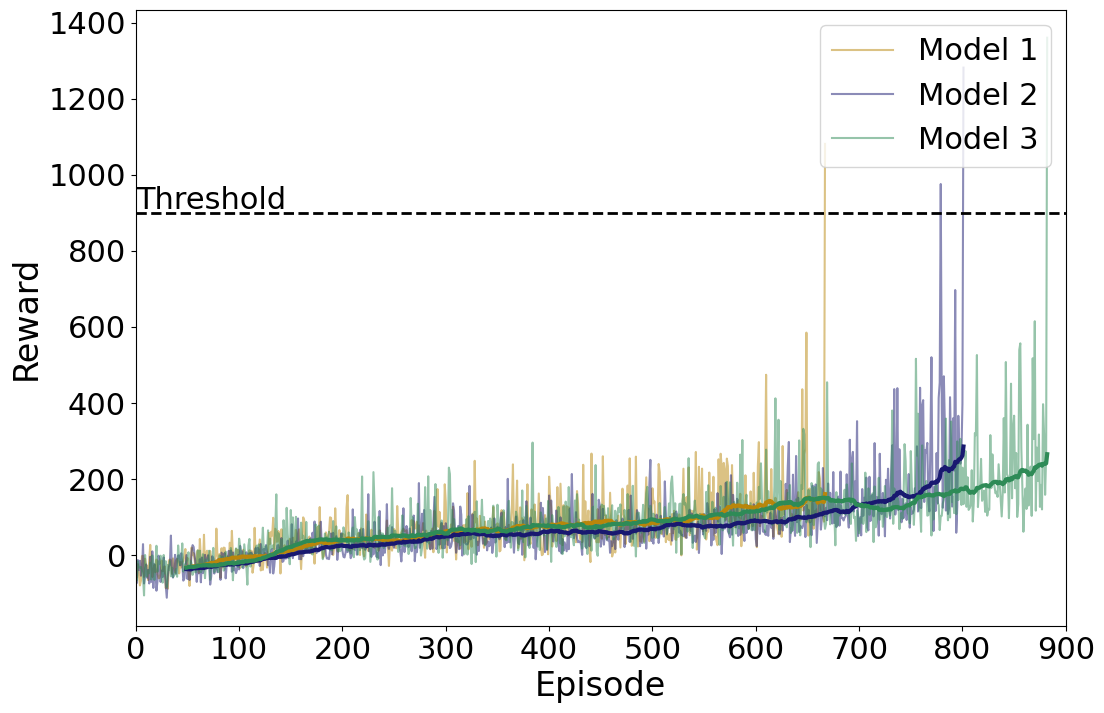

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(df1['episode_reward'], label='Model 1', color='darkgoldenrod', alpha=0.5)
plt.plot(df2['episode_reward'], label='Model 2', color='midnightblue', alpha=0.5)
plt.plot(df3['episode_reward'], label='Model 3', color='seagreen', alpha=0.5)

plt.plot(df1['episode_reward'].rolling(window=50).mean(), color='darkgoldenrod', lw=3)
plt.plot(df2['episode_reward'].rolling(window=50).mean(), color='midnightblue', lw=3)
plt.plot(df3['episode_reward'].rolling(window=50).mean(), color='seagreen', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 900)
plt.show()

Params:
- PPO
- Hidden layers 32,
- CNN output size 32
- learning rate 0.00025
- gamma 0.99
- max_grad_norm 0.5
- clip param 0.1
- ppo epoch 10
- batch size 64
- network update frequency 1
- sync freq 100
- gas 4

In [28]:
path_4 = r"/home/docker/car_racing/models/PPO_2"
path_5 = r"/home/docker/car_racing/models/PPO_6"

In [29]:
file_4 = os.path.join(path_4, "2024-03-31 154110.831378_PPO_training_results.json")
file_5 = os.path.join(path_5, "2024-04-04 165430.595864_PPO_training_results.json")

with open(file_4, "r") as f:
    data_4 = json.load(f)
with open(file_5, "r") as f:
    data_5 = json.load(f)

In [30]:
for dictionary in [data_4, data_5]:
    dictionary.pop("loss_evolution")

In [31]:
data_4 = convert_data(data_4)
data_5 = convert_data(data_5)
df4 = pd.DataFrame(data_4)
df5 = pd.DataFrame(data_5)

In [32]:
df4 = df4[keep_cols]
df5 = df5[keep_cols]

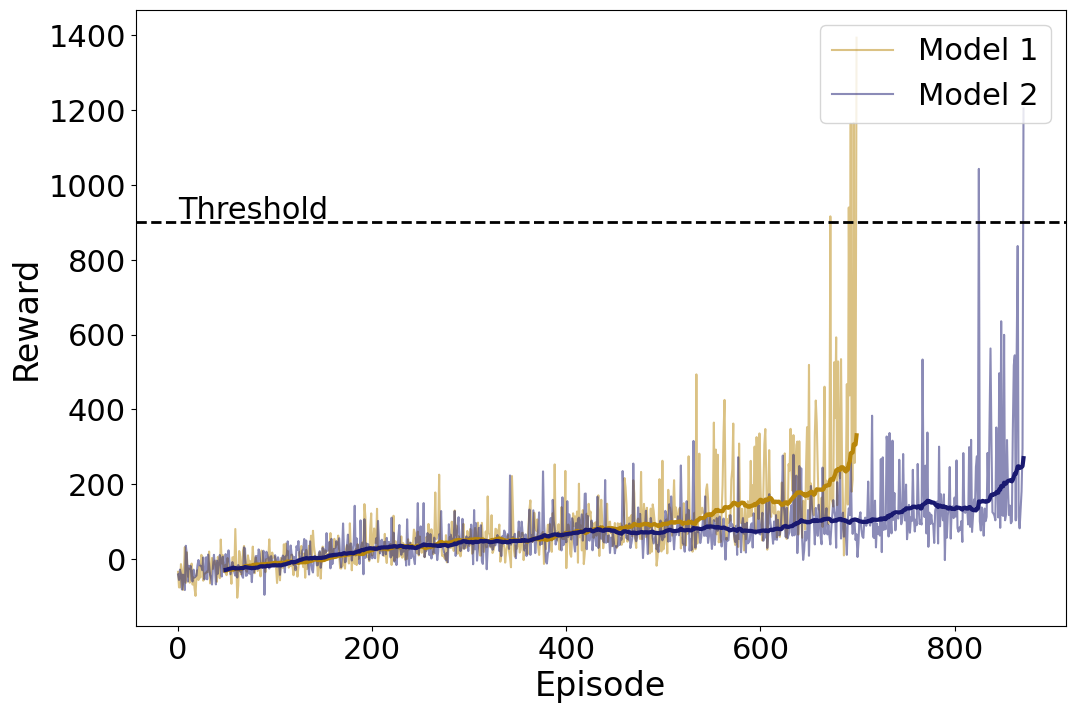

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(df4['episode_reward'], label='Model 1', color='darkgoldenrod', alpha=0.5)
plt.plot(df5['episode_reward'], label='Model 2', color='midnightblue', alpha=0.5)
plt.plot(df4['episode_reward'].rolling(window=50).mean(), color='darkgoldenrod', lw=3)
plt.plot(df5['episode_reward'].rolling(window=50).mean(), color='midnightblue', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
# plt.xlim(0, 275)

plt.show()

# Influence of learning rate

Params:
- PPO
- Hidden layers 256,
- CNN output size 256
- learning rate 0.01, 0.001, 0.0001, 0.00001
- gamma 0.99
- max_grad_norm 0.5
- clip param 0.1
- ppo epoch 10
- batch size 64
- gas 4

In [34]:
path_6 = r"/home/docker/car_racing/models/PPO_13" # LR = 0.00001
path_7 = r"/home/docker/car_racing/models/PPO_5" # LR = 0.0001
path_8 = r"/home/docker/car_racing/models/PPO_7" # LR = 0.001
path_9 = r"/home/docker/car_racing/models/PPO_8" # LR = 0.01

In [35]:
file_lr00001 = os.path.join(path_6, "2024-04-07 094440.875077_PPO_training_results.json")
file_lr0001 = os.path.join(path_7, "2024-04-03 163043.964951_PPO_training_results.json")
file_lr001 = os.path.join(path_8, "2024-04-04 153927.028594_PPO_training_results.json")
file_lr01 = os.path.join(path_9, "2024-04-05 164723.391603_PPO_training_results.json")

with open(file_lr00001, "r") as f:
    data_lr00001 = json.load(f)
with open(file_lr0001, "r") as f:
    data_lr0001 = json.load(f)
with open(file_lr001, "r") as f:
    data_lr001 = json.load(f)
with open(file_lr01, "r") as f:
    data_lr01 = json.load(f)

In [36]:
for dictionary in [data_lr00001, data_lr0001, data_lr001, data_lr01]:
    dictionary.pop("loss_evolution")

In [37]:
data_lr00001 = convert_data(data_lr00001)
df_lr00001 = pd.DataFrame(data_lr00001)

data_lr0001 = convert_data(data_lr0001)
df_lr0001 = pd.DataFrame(data_lr0001)

data_lr001 = convert_data(data_lr001)
df_lr001 = pd.DataFrame(data_lr001)

data_lr01 = convert_data(data_lr01)
df_lr01 = pd.DataFrame(data_lr01)

In [38]:
df_lr00001 = df_lr00001[keep_cols]
df_lr0001 = df_lr0001[keep_cols]
df_lr001 = df_lr001[keep_cols]
df_lr01 = df_lr01[keep_cols]

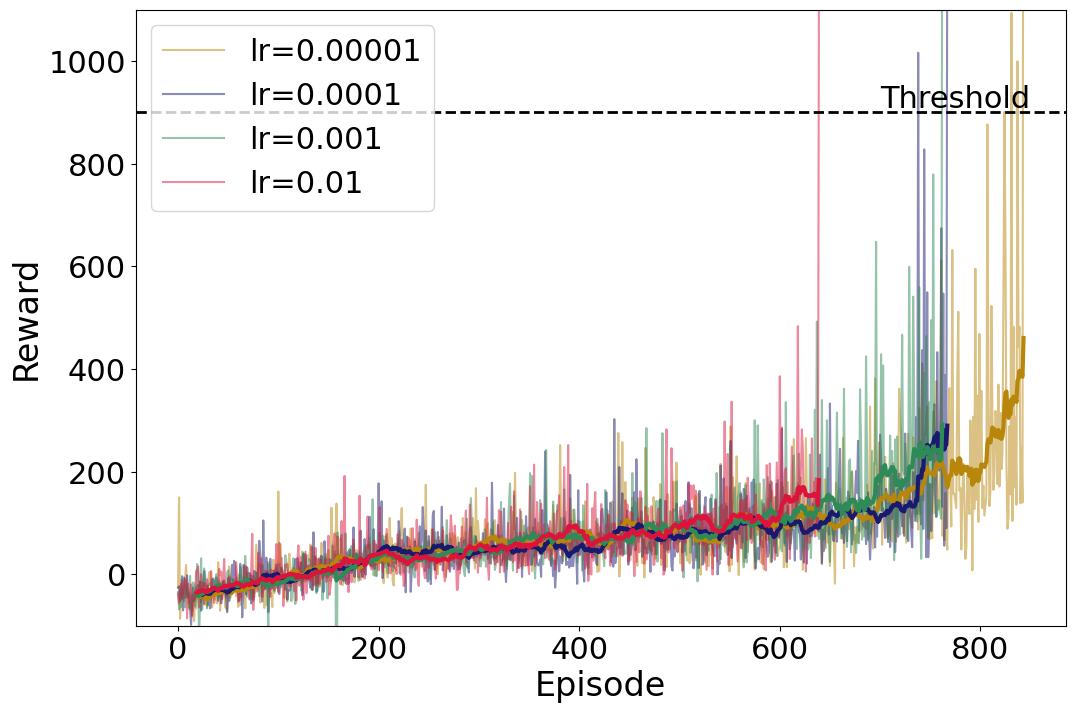

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(df_lr00001['episode_reward'], label='lr=0.00001', color='darkgoldenrod', alpha=0.5)
plt.plot(df_lr0001['episode_reward'], label='lr=0.0001', color='midnightblue', alpha=0.5)
plt.plot(df_lr001['episode_reward'], label='lr=0.001', color='seagreen', alpha=0.5)
plt.plot(df_lr01['episode_reward'], label='lr=0.01', color='crimson', alpha=0.5)

plt.plot(df_lr00001['episode_reward'].rolling(window=20).mean(), color='darkgoldenrod', lw=3)
plt.plot(df_lr0001['episode_reward'].rolling(window=20).mean(), color='midnightblue', lw=3)
plt.plot(df_lr001['episode_reward'].rolling(window=20).mean(), color='seagreen', lw=3)
plt.plot(df_lr01['episode_reward'].rolling(window=20).mean(), color='crimson', lw=3)

plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper left')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(700, 910, 'Threshold', fontsize=22, color='black')
# plt.xlim(0, 750)
plt.ylim(-100, 1100)

plt.show()

In [40]:
df_lr00001.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,844.000000,844.000000,844.000000,844.000000
mean,104.221564,87.405479,96.300936,66.697686
std,51.502635,133.403892,109.348603,64.883325
min,24.000000,-90.754930,-26.908126,-37.315560
25%,70.000000,23.085277,48.462609,22.381768
50%,106.000000,64.581888,74.780608,66.797230
75%,118.250000,115.135157,103.983693,101.847651
max,482.000000,2058.683871,1631.172597,275.189453


In [41]:
df_lr0001.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,768.000000,768.000000,768.000000,768.000000
mean,98.365885,65.991454,74.942861,49.114589
std,47.493445,99.200596,80.957431,49.438028
min,20.000000,-98.506349,-40.186123,-40.476038
25%,68.000000,16.680371,41.876835,9.669006
50%,99.000000,51.243799,65.864564,49.957529
75%,118.000000,96.047131,88.357315,85.278136
max,448.000000,1293.706349,1067.260277,185.338216


In [42]:
df_lr001.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,763.00000,763.000000,763.000000,763.000000
mean,126.48886,72.903313,85.463895,55.121299
std,51.02113,107.550289,93.210531,58.953587
min,43.00000,-439.626966,-189.537090,-56.308927
25%,108.00000,21.465684,40.297138,5.524168
50%,117.00000,55.726027,70.828561,62.503230
75%,127.00000,97.494961,101.130099,90.516035
max,558.00000,1470.808664,1233.738481,207.789570


In [43]:
df_lr01.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,640.000000,640.000000,640.000000,640.000000
mean,102.118750,55.119663,66.310216,40.604897
std,40.115541,79.931214,57.524068,46.375056
min,26.000000,-85.383459,-19.351139,-47.056716
25%,74.000000,6.132759,35.758926,-0.357506
50%,106.000000,44.219410,63.310121,39.819447
75%,120.000000,88.634382,84.796258,76.683223
max,382.000000,1117.442857,912.469177,137.394732


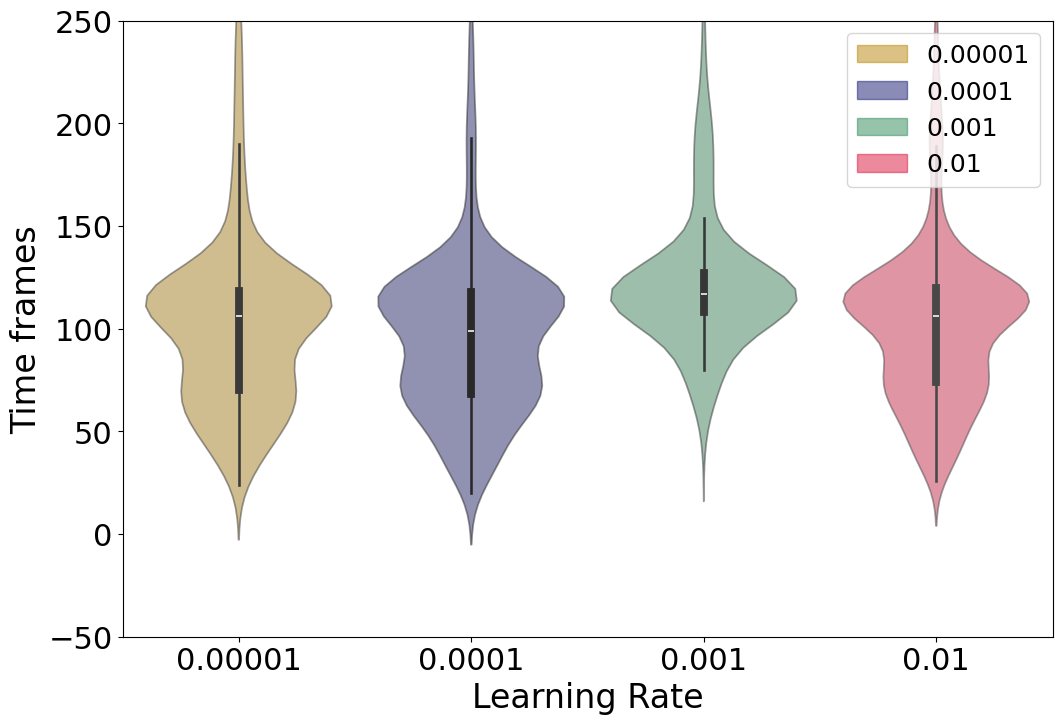

In [44]:
dataframes = [df_lr00001, df_lr0001, df_lr001, df_lr01]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
positions = np.arange(len(dataframes))
labels = ['0.00001', '0.0001', '0.001', '0.01']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Learning Rate', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.ylim(-50, 250)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

# Influence of buffer size

Params:
- PPO
- Hidden layers 256,
- CNN output size 256
- learning rate 0.0001
- gamma 0.99
- max_grad_norm 0.5
- clip param 0.1
- ppo epoch 10
- batch size 32, 64, 128, 256
- gas 4

In [45]:
path_10 = r"/home/docker/car_racing/models/PPO_11" # Batch size 32
path_11 = r"/home/docker/car_racing/models/PPO_9" # Batch size 64
path_12 = r"/home/docker/car_racing/models/PPO_10" # Batch size 256

In [46]:
file_buffer32 = os.path.join(path_10, "2024-04-06 073324.379306_PPO_training_results.json")
file_buffer64 = os.path.join(path_11, "2024-04-06 070554.018363_PPO_training_results.json")
file_buffer256 = os.path.join(path_12, "2024-04-06 163120.054121_PPO_training_results.json")

with open(file_buffer32, "r") as f:
    data_buffer32 = json.load(f)
with open(file_buffer64, "r") as f:
    data_buffer64 = json.load(f)
with open(file_buffer256, "r") as f:
    data_buffer256 = json.load(f)

In [47]:
for dictionary in [data_buffer32, data_buffer64, data_buffer256]:
    dictionary.pop("loss_evolution")

In [48]:
data_buffer32 = convert_data(data_buffer32)
df_buffer32 = pd.DataFrame(data_buffer32)
data_buffer64 = convert_data(data_buffer64)
df_buffer64 = pd.DataFrame(data_buffer64)
data_buffer256 = convert_data(data_buffer256)
df_buffer256 = pd.DataFrame(data_buffer256)

In [49]:
df_buffer32 = df_buffer32[keep_cols]
df_buffer64 = df_buffer64[keep_cols]
df_buffer256 = df_buffer256[keep_cols]

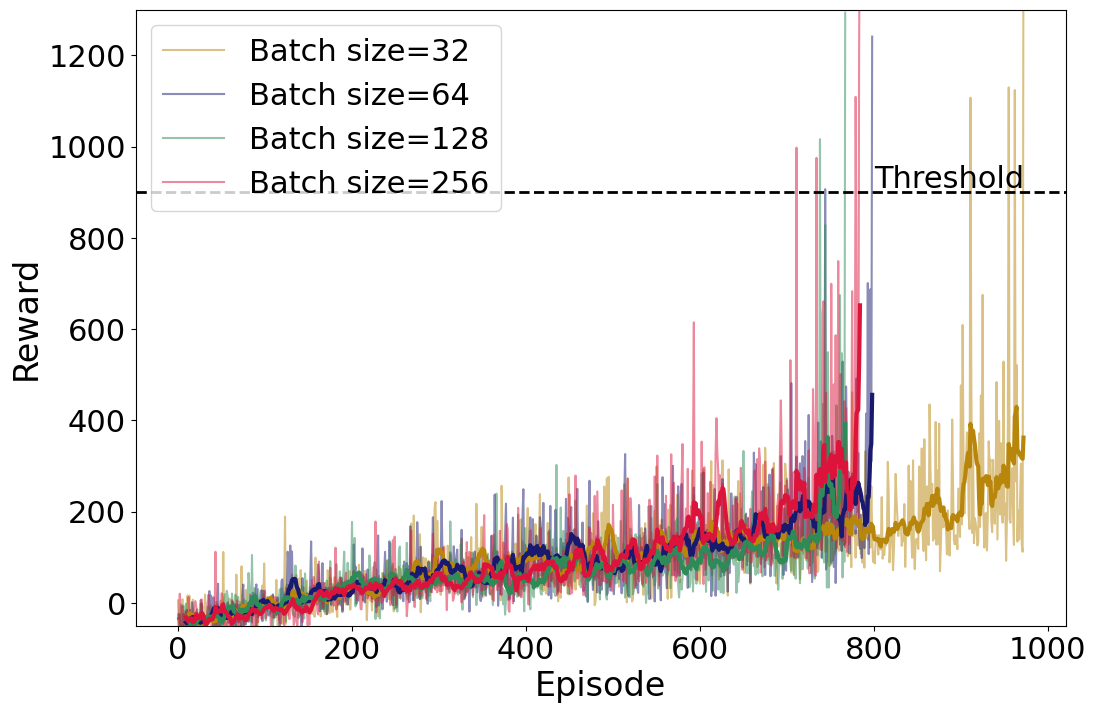

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(df_buffer32['episode_reward'], label='Batch size=32', color='darkgoldenrod', alpha=0.5)
plt.plot(df_buffer64['episode_reward'], label='Batch size=64', color='midnightblue', alpha=0.5)
plt.plot(df_lr0001['episode_reward'], label='Batch size=128', color='seagreen', alpha=0.5)
plt.plot(df_buffer256['episode_reward'], label='Batch size=256', color='crimson', alpha=0.5)

plt.plot(df_buffer32['episode_reward'].rolling(window=10).mean(), color='darkgoldenrod', lw=3)
plt.plot(df_buffer64['episode_reward'].rolling(window=10).mean(), color='midnightblue', lw=3)
plt.plot(df_lr0001['episode_reward'].rolling(window=10).mean(), color='seagreen', lw=3)
plt.plot(df_buffer256['episode_reward'].rolling(window=10).mean(), color='crimson', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper left')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(800, 910, 'Threshold', fontsize=22, color='black')
plt.ylim(-50, 1300)

plt.show()

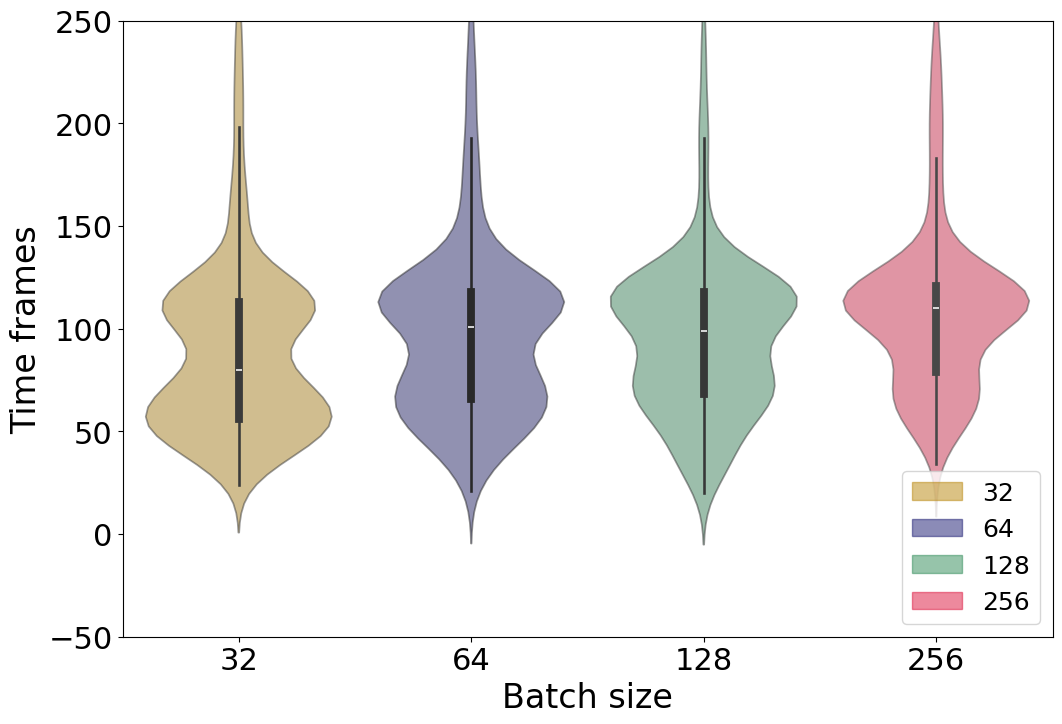

In [51]:
dataframes = [df_buffer32, df_buffer64, df_lr0001, df_buffer256]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
positions = np.arange(len(dataframes))
labels = ['32', '64', '128', '256']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Batch size', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.ylim(-50, 250)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='lower right')

plt.show()

In [52]:
df_buffer32.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,973.000000,973.000000,973.000000,973.000000
mean,90.038027,107.081055,107.660835,89.653843
std,46.103252,122.886821,96.754579,74.934283
min,24.000000,-93.824818,-40.630609,-54.909757
25%,56.000000,37.031034,57.222739,23.506196
50%,80.000000,96.402484,91.299815,92.376757
75%,113.000000,147.072990,129.893063,145.953726
max,443.000000,1587.540845,1147.347237,276.227296


In [53]:
df_buffer64.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,799.000000,799.000000,799.000000,799.000000
mean,99.769712,88.265885,93.753677,69.646329
std,48.751938,109.303825,90.078756,66.949208
min,21.000000,-82.449153,-30.014376,-47.494561
25%,66.000000,19.219923,46.380205,15.973853
50%,101.000000,71.276821,78.699320,72.720591
75%,118.000000,129.798390,114.480481,111.554758
max,476.000000,1241.060784,969.801396,236.363411


In [54]:
df_lr0001.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,768.000000,768.000000,768.000000,768.000000
mean,98.365885,65.991454,74.942861,49.114589
std,47.493445,99.200596,80.957431,49.438028
min,20.000000,-98.506349,-40.186123,-40.476038
25%,68.000000,16.680371,41.876835,9.669006
50%,99.000000,51.243799,65.864564,49.957529
75%,118.000000,96.047131,88.357315,85.278136
max,448.000000,1293.706349,1067.260277,185.338216


In [55]:
df_buffer256.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,785.000000,785.000000,785.000000,785.000000
mean,111.383439,91.734601,101.823711,68.228924
std,48.415290,143.580495,117.602508,77.344822
min,34.000000,-115.822892,-65.505245,-42.390706
25%,79.000000,16.446844,41.492780,4.285200
50%,110.000000,58.800000,72.359847,56.423107
75%,121.000000,126.021854,120.863369,118.654184
max,456.000000,1613.381605,1149.520527,290.427346


# Influence of gas weight

Params:
- PPO
- Hidden layers 256,
- CNN output size 256
- learning rate 0.0001
- gamma 0.99
- max_grad_norm 0.5
- clip param 0.1
- ppo epoch 10
- batch size 128
- gas 1,2,4

In [56]:
path_13 = r"/home/docker/car_racing/models/PPO_15" # Gas weight 1
path_14 = r"/home/docker/car_racing/models/PPO_14" # Gas weight 2

In [57]:
file_gw1 = os.path.join(path_13, "2024-04-09 185132.980184_PPO_training_results.json")
file_gw2 = os.path.join(path_14, "2024-04-08 161048.586262_PPO_training_results.json")

In [58]:
with open(file_gw1, "r") as f:
    data_gw1 = json.load(f)
with open(file_gw2, "r") as f:
    data_gw2 = json.load(f)

In [59]:
for dictionary in [data_gw1, data_gw2]:
    dictionary.pop("loss_evolution")

In [60]:
data_gw1 = convert_data(data_gw1)
df_gw1 = pd.DataFrame(data_gw1)
data_gw2 = convert_data(data_gw2)
df_gw2 = pd.DataFrame(data_gw2)

In [61]:
df_gw1 = df_gw1[keep_cols]
df_gw2 = df_gw2[keep_cols]

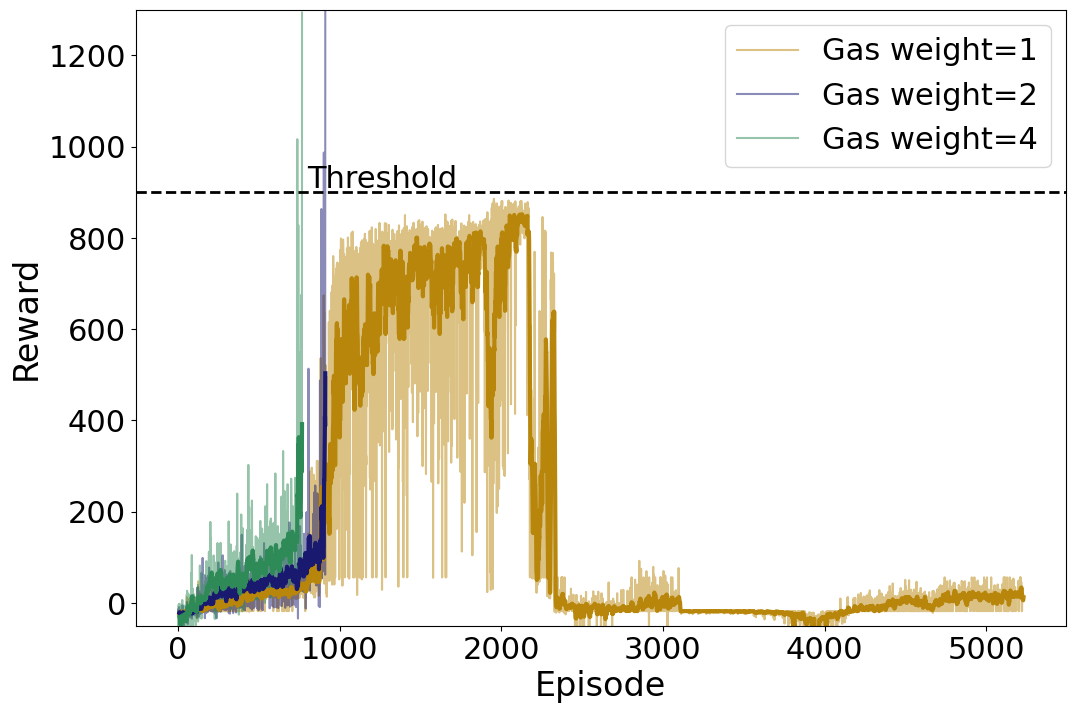

In [68]:
plt.figure(figsize=(12, 8))
plt.plot(df_gw1['episode_reward'], label='Gas weight=1', color='darkgoldenrod', alpha=0.5)
plt.plot(df_gw2['episode_reward'], label='Gas weight=2', color='midnightblue', alpha=0.5)
plt.plot(df_lr0001['episode_reward'], label='Gas weight=4', color='seagreen', alpha=0.5)

plt.plot(df_gw1['episode_reward'].rolling(window=10).mean(), color='darkgoldenrod', lw=3)
plt.plot(df_gw2['episode_reward'].rolling(window=10).mean(), color='midnightblue', lw=3)
plt.plot(df_lr0001['episode_reward'].rolling(window=10).mean(), color='seagreen', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(800, 910, 'Threshold', fontsize=22, color='black')
plt.ylim(-50, 1300)

plt.show()

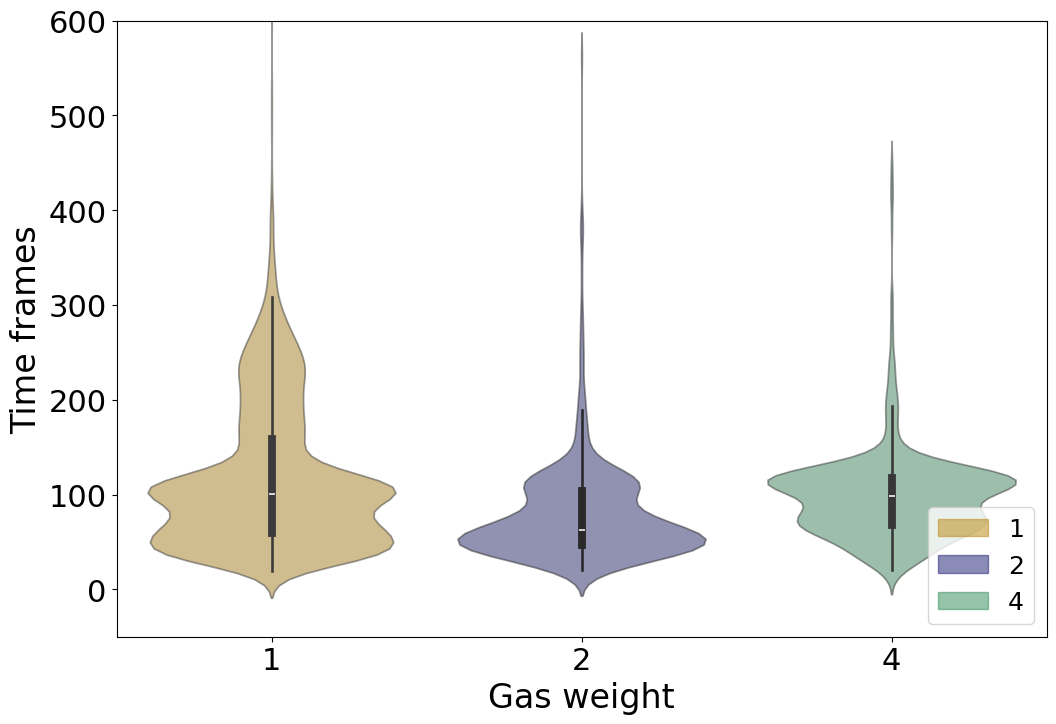

In [67]:
dataframes = [df_gw1, df_gw2, df_lr0001]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen']
positions = np.arange(len(dataframes))
labels = ['1', '2', '4']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Gas weight', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.ylim(-50, 600)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='lower right')

plt.show()

In [69]:
df_gw1.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,5232.000000,5232.000000,5232.000000,5232.000000
mean,117.966934,168.446798,130.644193,168.082168
std,77.099738,311.285581,216.296733,290.551270
min,19.000000,-357.424691,-189.065106,-48.985113
25%,59.000000,-17.984707,0.312715,-14.938120
50%,101.000000,10.593707,11.585939,2.819902
75%,159.000000,160.790361,191.776221,291.922912
max,608.000000,885.800000,614.778853,833.117104


In [70]:
df_gw2.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,912.000000,912.000000,912.000000,912.000000
mean,79.179825,44.099423,52.014065,31.961397
std,52.148615,86.077329,69.242322,36.300622
min,20.000000,-66.387702,-30.716485,-25.324384
25%,47.000000,-8.078592,20.425623,3.287292
50%,63.000000,38.135992,38.253745,36.961486
75%,104.000000,64.554312,56.678927,52.995946
max,561.000000,1307.981818,1035.194553,153.879770


In [72]:
df_lr0001.describe()

,time_frame_counter,episode_reward,reward_moving_avg,average_rewards
count,768.000000,768.000000,768.000000,768.000000
mean,98.365885,65.991454,74.942861,49.114589
std,47.493445,99.200596,80.957431,49.438028
min,20.000000,-98.506349,-40.186123,-40.476038
25%,68.000000,16.680371,41.876835,9.669006
50%,99.000000,51.243799,65.864564,49.957529
75%,118.000000,96.047131,88.357315,85.278136
max,448.000000,1293.706349,1067.260277,185.338216
